# Dự đoán Doanh thu Bán Lẻ


## 1. Giới Thiệu Và Cài Đặt Tài Nguyên

In [1]:
# Cài đặt các thư viện cần thiết
install.packages("dplyr")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("bnlearn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("graph", "Rgraphviz"), update=FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'graph', 'Rgraphviz'

also installing the dependency ‘BiocGenerics’




In [4]:
if(!require(corrplot)) install.packages("corrplot")
if(!require(DescTools)) install.packages("DescTools", dependencies=TRUE)

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DescTools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DescTools’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘RDCOMClient’ is not available”
also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘VGAM’, ‘R.rsp’




In [5]:
# @title
library(readxl)
library(dplyr)
library(lubridate)
library(bnlearn)
library(Rgraphviz)
library(corrplot)
library(DescTools)
library(readr) # Add readr library for read_csv


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: graph

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: ‘generics’


The following object is masked from ‘package:lubridate’:

    as.difftime


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:bnlearn’:

    score


The following object is masked from ‘package:dplyr’:

    combine


The following objects are masked from ‘package:stats’:

    IQR,

## 2. Chuẩn Bị Dữ Liệu

### 2.1. Tải Dữ Liệu

In [34]:
file_path <- "online_shoppers_intention.csv"
df <- read_csv(file_path, col_names = TRUE)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
df

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,0.0,0,0,0,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [36]:
cols_to_factor <- c("Month", "OperatingSystems", "Browser", "Region",
                    "TrafficType", "VisitorType", "Weekend", "Revenue")

df <- df %>%
  mutate(across(all_of(cols_to_factor), as.factor))

# Kiểm tra lại cấu trúc dữ liệu
str(df)

tibble [12,330 × 18] (S3: tbl_df/tbl/data.frame)
 $ Administrative         : num [1:12330] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : num [1:12330] 1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num [1:12330] 0 64 0 2.67 627.5 ...
 $ BounceRates            : num [1:12330] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12330] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12330] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12330] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Reg

In [37]:
cols_to_summarize <- c("Administrative", "Administrative_Duration",
                       "Informational", "Informational_Duration",
                       "ProductRelated", "ProductRelated_Duration")
summary_stats <- summary(df[, cols_to_summarize])

cat("Thông tin thống kê tổng thể của các biến:\n\n")
print(summary_stats)

Thông tin thống kê tổng thể của các biến:

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   7.50         Median : 0.0000  
 Mean   : 2.315   Mean   :  80.82         Mean   : 0.5036  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  184.1        
 Median :   0.00        Median : 18.00   Median :  598.9        
 Mean   :  34.47        Mean   : 31.73   Mean   : 1194.7        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        


### 2.2. Làm Sạch Dữ Liệu

In [10]:
# set.seed(123)

# # Lọc ra hai lớp: lớp thiểu số (mua hàng) và lớp đa số (không mua hàng)
# df_positive <- df %>% filter(Revenue == TRUE)
# df_negative <- df %>% filter(Revenue == FALSE)

# # Lấy mẫu ngẫu nhiên từ lớp đa số với số lượng bằng lớp thiểu số
# df_negative_sampled <- df_negative %>% sample_n(size = nrow(df_positive))

# # Kết hợp lại để tạo ra bộ dữ liệu cân bằng
# df <- bind_rows(df_positive, df_negative_sampled)

# # In ra sự phân bổ của biến Revenue trong bộ dữ liệu mới để kiểm tra
# cat("Phân bổ Revenue sau khi xử lý mất cân bằng (undersampling):\n\n")
# print(table(df$Revenue))

# # Hiển thị 6 dòng đầu của bộ dữ liệu cân bằng
# cat("\n\nDữ liệu cân bằng sẵn sàng cho mô hình:\n\n")
# head(df)

Phân bổ Revenue sau khi xử lý mất cân bằng (undersampling):


FALSE  TRUE 
 1908  1908 


Dữ liệu cân bằng sẵn sàng cho mô hình:



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3,87.83333,0,0.0,27,798.3333,0.000000000,0.012643678,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,FALSE,TRUE
10,1005.66667,0,0.0,36,2111.3417,0.004347826,0.014492754,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,FALSE,TRUE
4,61.00000,0,0.0,19,607.0000,0.000000000,0.026984127,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,TRUE,TRUE
9,111.50000,1,48.5,49,1868.8197,0.000000000,0.020708874,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,FALSE,TRUE
2,56.00000,1,144.0,67,2563.7833,0.000000000,0.005797101,19.342650,0.0,Mar,2,2,4,2,New_Visitor,FALSE,TRUE
0,0.00000,0,0.0,17,840.2333,0.000000000,0.001666667,109.176000,0.0,Mar,2,2,9,2,New_Visitor,FALSE,TRUE


In [38]:
custom_discretize <- function(x) {
  # Tìm giá trị trung vị (median) của các giá trị lớn hơn 0
  # Đây sẽ là ngưỡng để phân chia "Low" và "High"
  median_nonzero <- median(x[x > 0], na.rm = TRUE)

  # Xử lý trường hợp đặc biệt nếu tất cả giá trị đều bằng 0
  if (is.na(median_nonzero)) {
    median_nonzero <- 0
  }

  # Trả về một factor với 3 mức: "Zero", "Low", "High"
  factor(
    ifelse(x == 0, "Zero",
           ifelse(x <= median_nonzero, "Low", "High")),
    levels = c("Zero", "Low", "High")
  )
}

# 2. Xác định các cột cần áp dụng hàm rời rạc hóa tùy chỉnh
cols_to_discretize <- c("Administrative", "Administrative_Duration",
                        "Informational", "Informational_Duration",
                        "ProductRelated", "ProductRelated_Duration",
                        "BounceRates", "ExitRates", "PageValues", "SpecialDay")

# 3. Tạo dataframe mới và áp dụng hàm
df_final <- df
df_final[, cols_to_discretize] <- lapply(df[, cols_to_discretize], custom_discretize)

month_levels <- c("Jan", "Feb", "Mar", "Apr", "May", "June",
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

df_final$Month <- as.numeric(factor(df_final$Month, levels = month_levels))
df_final$VisitorType <- as.numeric(as.factor(df_final$VisitorType))

# In ra 6 dòng đầu của dữ liệu đã rời rạc hóa để kiểm tra kết quả
cat("Dữ liệu sau khi rời rạc hóa bằng hàm tùy chỉnh:\n\n")
head(df_final)

Dữ liệu sau khi rời rạc hóa bằng hàm tùy chỉnh:



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
Zero,Zero,Zero,Zero,Low,Zero,High,High,Zero,Zero,2,1,1,1,1,3,FALSE,FALSE
Zero,Zero,Zero,Zero,Low,Low,Zero,High,Zero,Zero,2,2,2,1,2,3,FALSE,FALSE
Zero,Zero,Zero,Zero,Low,Zero,High,High,Zero,Zero,2,4,1,9,3,3,FALSE,FALSE
Zero,Zero,Zero,Zero,Low,Low,High,High,Zero,Zero,2,3,2,2,4,3,FALSE,FALSE
Zero,Zero,Zero,Zero,Low,Low,High,High,Zero,Zero,2,3,3,1,4,3,TRUE,FALSE
Zero,Zero,Zero,Zero,High,Low,High,Low,Zero,Zero,2,2,2,1,3,3,FALSE,FALSE


## 3. Phân Tích Khám Phá (EDA)

In [39]:
library(ggplot2)
library(dplyr)
library(tidyr) # Dùng cho hàm pivot_longe

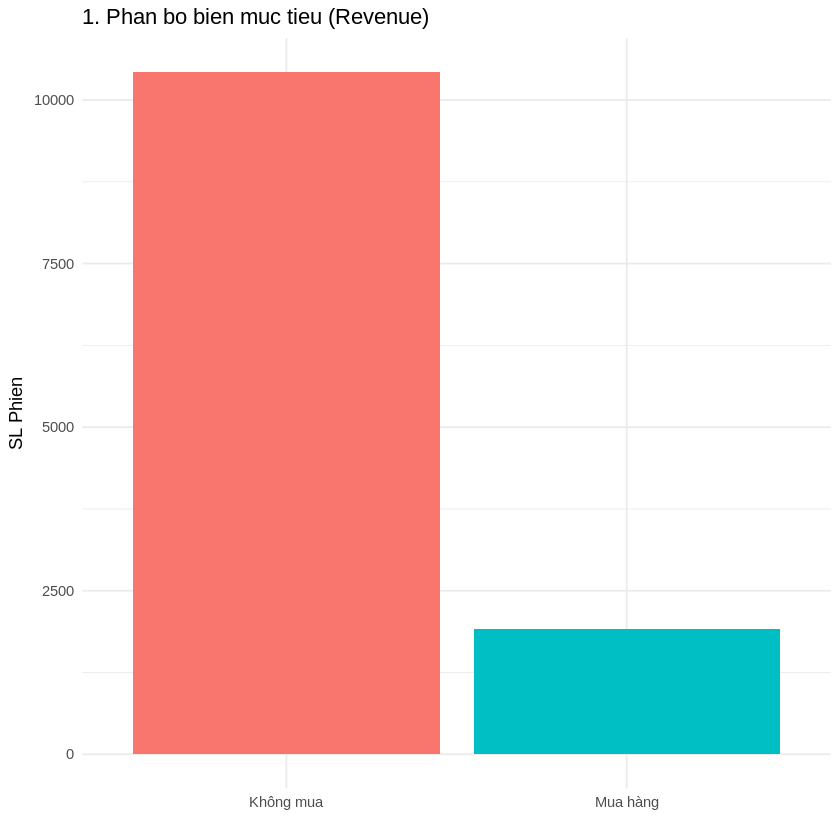

In [58]:
p1 <- ggplot(df, aes(x = Revenue, fill = as.factor(Revenue))) +
  geom_bar(show.legend = FALSE) +
  scale_x_discrete(labels=c("Không mua", "Mua hàng")) +
  labs(title = "1. Phan bo bien muc tieu (Revenue)",
       x = "", y = "SL Phien") +
  theme_minimal()
print(p1)

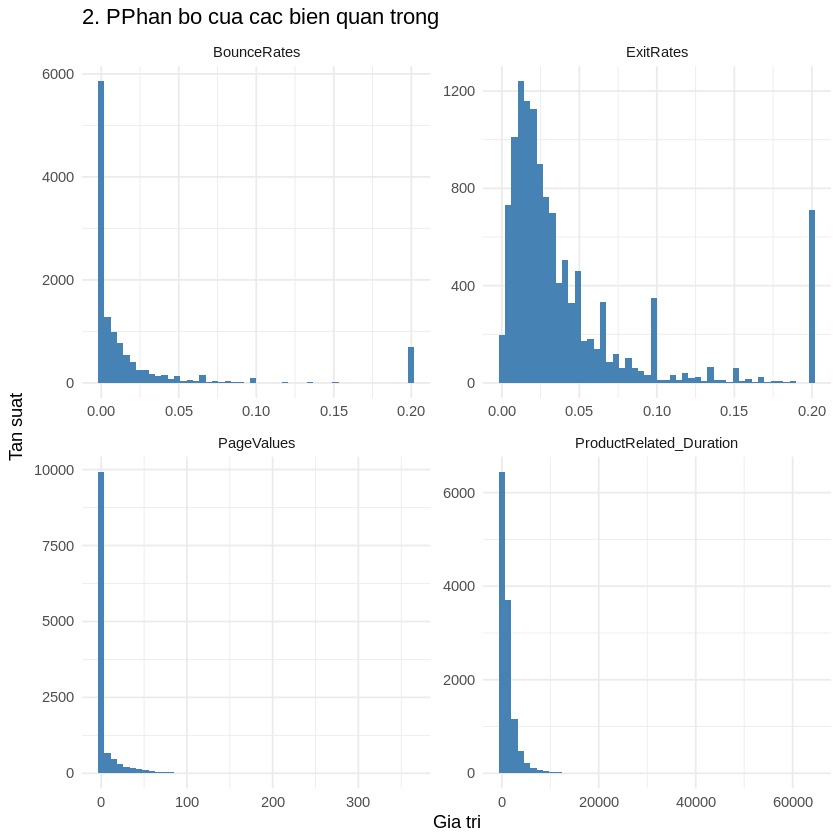

In [59]:
# ---- BIỂU ĐỒ 2: Phân bổ của các biến số quan trọng ----
# Biểu đồ này cho thấy các biến số bị lệch trái rất mạnh
numerical_cols <- c("ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues")
df %>%
  select(all_of(numerical_cols)) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
  ggplot(aes(x = value)) +
    geom_histogram(bins = 50, fill = "steelblue") +
    facet_wrap(~variable, scales = "free") +
    labs(title = "2. PPhan bo cua cac bien quan trong", x="Gia tri", y="Tan suat") +
    theme_minimal()

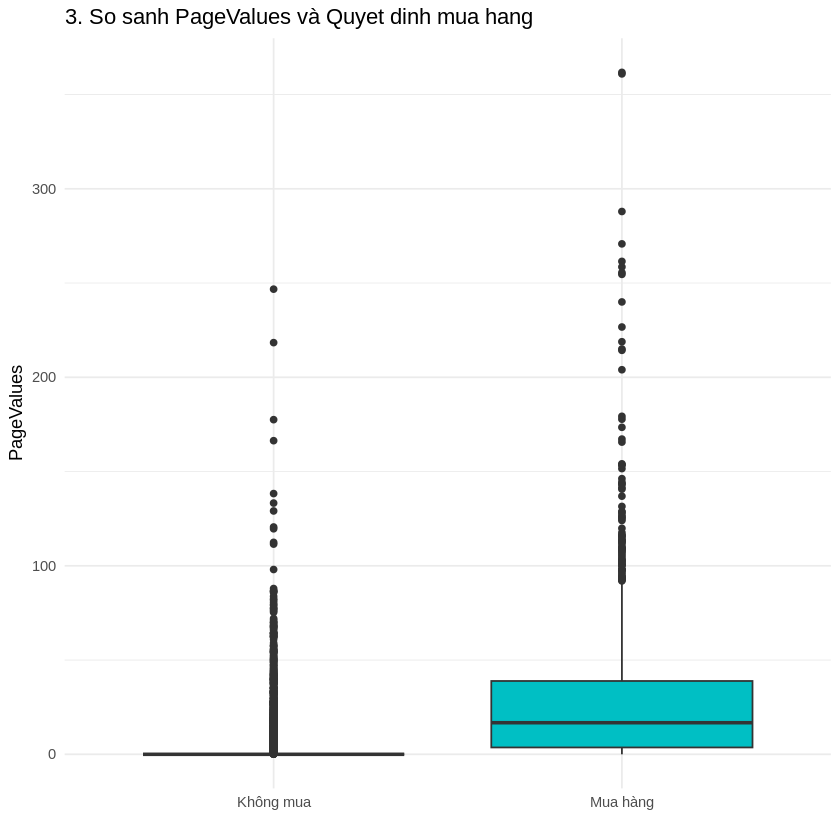

In [60]:
# ---- BIỂU ĐỒ 3: So sánh PageValues giữa 2 lớp Revenue ----
# Biểu đồ này cho thấy PageValues là một biến dự báo rất tốt
p3 <- ggplot(df, aes(x = Revenue, y = PageValues, fill = as.factor(Revenue))) +
  geom_boxplot(show.legend = FALSE) +
  scale_x_discrete(labels=c("Không mua", "Mua hàng")) +
  labs(title = "3. So sanh PageValues và Quyet dinh mua hang",
       x = "", y = "PageValues") +
  theme_minimal()
print(p3)

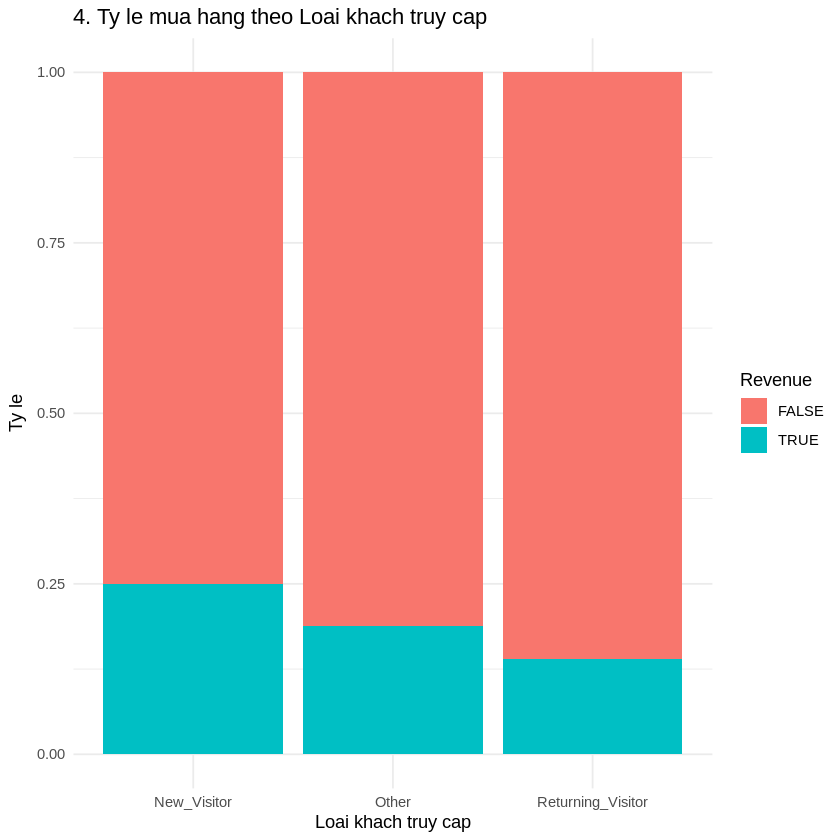

In [61]:
# ---- BIỂU ĐỒ 4: Tỷ lệ mua hàng theo Loại khách truy cập ----
# Biểu đồ này so sánh tỷ lệ mua hàng giữa các nhóm khách
p4 <- ggplot(df, aes(x = VisitorType, fill = Revenue)) +
    geom_bar(position = "fill") +
    labs(title = "4. Ty le mua hang theo Loai khach truy cap",
         x = "Loai khach truy cap", y = "Ty le") +
    theme_minimal()
print(p4)

## 4. Xây Dựng Và Huấn Luyện Mô Hình

### 4.1 Mô hình Hill Climb

In [44]:
cat("Các level của 'Administrative' TRƯỚC khi dọn dẹp:\n")
print(levels(df_final$Administrative))
cat("\nBảng tần suất của 'Administrative':\n")
print(table(df_final$Administrative))

# Vòng lặp qua tất cả các cột trong dataframe
for (col_name in names(df_final)) {
  # Nếu cột là một factor
  if (is.factor(df_final[[col_name]])) {
    # "Re-factor" lại cột đó. Thao tác này sẽ tự động loại bỏ các level không được sử dụng.
    df_final[[col_name]] <- factor(df_final[[col_name]])
  }
}

cat("\n-------------------------------------------------\n")
cat("Đã dọn dẹp xong các biến factor.\n")

# In ra để kiểm tra level của biến 'Administrative' SAU khi dọn dẹp
cat("Các level của 'Administrative' SAU khi dọn dẹp:\n")
print(levels(df_final$Administrative))
cat("\nBây giờ dữ liệu đã hoàn toàn sẵn sàng.\n")

Các level của 'Administrative' TRƯỚC khi dọn dẹp:
[1] "Zero" "Low"  "High"

Bảng tần suất của 'Administrative':

Zero  Low High 
5768 3383 3179 

-------------------------------------------------
Đã dọn dẹp xong các biến factor.
Các level của 'Administrative' SAU khi dọn dẹp:
[1] "Zero" "Low"  "High"

Bây giờ dữ liệu đã hoàn toàn sẵn sàng.


Chuyển đổi dữ liệu sang định dạng data.frame cơ bản...
Định dạng dữ liệu sau khi chuyển đổi: data.frame 

Bắt đầu học cấu trúc mạng...
Đang học tham số cho mạng...

Bảng xác suất có điều kiện (CPT) của biến 'Revenue':

  Parameters of node Revenue (multinomial distribution)

Conditional probability table:
 
, , BounceRates = Zero, PageValues = Zero

       Administrative
Revenue       Zero        Low       High
  FALSE 0.97917631 0.94827586 0.93983153
  TRUE  0.02082369 0.05172414 0.06016847

, , BounceRates = Low, PageValues = Zero

       Administrative
Revenue       Zero        Low       High
  FALSE 0.93735499 0.94560000 0.91609354
  TRUE  0.06264501 0.05440000 0.08390646

, , BounceRates = High, PageValues = Zero

       Administrative
Revenue       Zero        Low       High
  FALSE 0.98803191 0.96571429 0.95698925
  TRUE  0.01196809 0.03428571 0.04301075

, , BounceRates = Zero, PageValues = Low

       Administrative
Revenue       Zero        Low       High
  FALSE 0.25757576 0

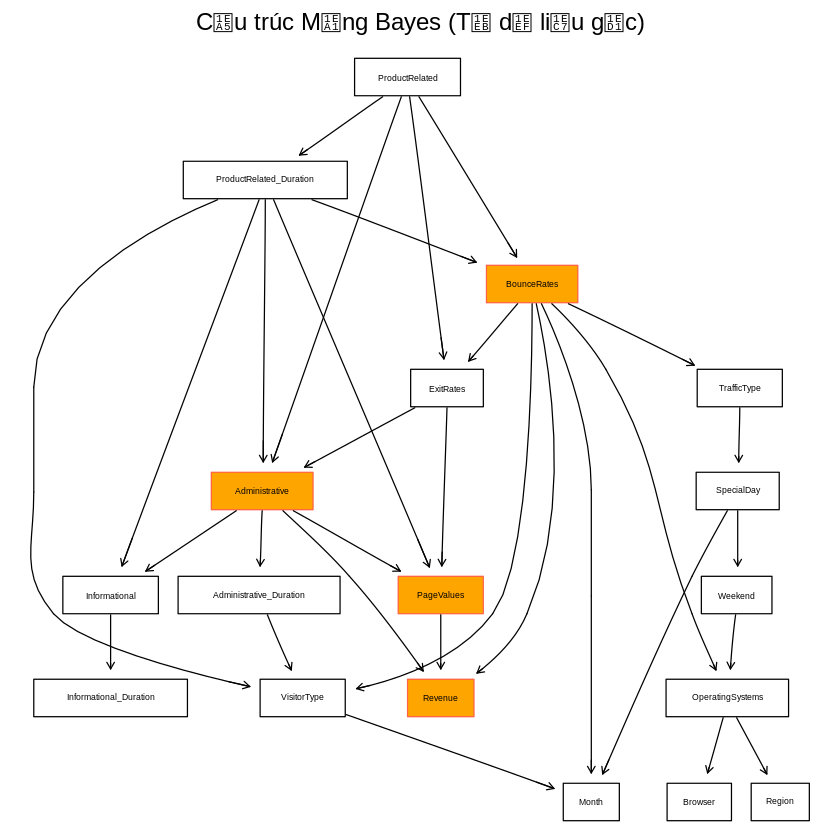

In [45]:
cat("Chuyển đổi dữ liệu sang định dạng data.frame cơ bản...\n")
df_final <- as.data.frame(df_final)
cat("Định dạng dữ liệu sau khi chuyển đổi:", class(df_final), "\n\n")


# ----- XÂY DỰNG MÔ HÌNH -----

# 1. Học cấu trúc mạng từ dữ liệu đã được chuyển đổi định dạng
cat("Bắt đầu học cấu trúc mạng...\n")
bn_structure_final <- hc(df_final)

# 2. Học tham số
cat("Đang học tham số cho mạng...\n")
bn_fitted_final <- bn.fit(bn_structure_final, data = df_final)

# 3. In ra CPT của 'Revenue'
cat("\nBảng xác suất có điều kiện (CPT) của biến 'Revenue':\n")
print(bn_fitted_final$Revenue)

# 4. Trực quan hóa cấu trúc mạng
cat("\nĐang vẽ đồ thị mạng Bayes...\n")
highlight_options <- list(
  nodes = c("Revenue", mb(bn_structure_final, "Revenue")),
  col = "tomato",
  fill = "orange"
)

graphviz.plot(
  bn_structure_final,
  highlight = highlight_options,
  main = "Cau truc mang Hill Climb"
)

In [46]:
if(!require(caTools)) install.packages("caTools")
library(caTools)

set.seed(42)

# Thực hiện chia dữ liệu theo tỷ lệ 9/1 dựa trên biến mục tiêu 'Revenue'
# sample.split sẽ tạo ra một vector TRUE/FALSE để chỉ định dòng nào thuộc tập train
split <- sample.split(df_final$Revenue, SplitRatio = 0.9)

# Tạo tập huấn luyện (90%)
train_set <- subset(df_final, split == TRUE)

# Tạo tập kiểm tra (10%)
test_set <- subset(df_final, split == FALSE)

# In ra kích thước của mỗi tập để kiểm tra
cat("Kích thước tập dữ liệu gốc:", dim(df_final), "\n")
cat("Kích thước tập huấn luyện (90%):", dim(train_set), "\n")
cat("Kích thước tập kiểm tra (10%):", dim(test_set), "\n\n")

# Kiểm tra tỷ lệ biến 'Revenue' trong mỗi tập
cat("Tỷ lệ 'Revenue' trong tập dữ liệu gốc:\n")
print(prop.table(table(df_final$Revenue)))
cat("\nTỷ lệ 'Revenue' trong tập huấn luyện:\n")
print(prop.table(table(train_set$Revenue)))
cat("\nTỷ lệ 'Revenue' trong tập kiểm tra:\n")
print(prop.table(table(test_set$Revenue)))

Kích thước tập dữ liệu gốc: 12330 18 
Kích thước tập huấn luyện (90%): 11097 18 
Kích thước tập kiểm tra (10%): 1233 18 

Tỷ lệ 'Revenue' trong tập dữ liệu gốc:

    FALSE      TRUE 
0.8452555 0.1547445 

Tỷ lệ 'Revenue' trong tập huấn luyện:

    FALSE      TRUE 
0.8452735 0.1547265 

Tỷ lệ 'Revenue' trong tập kiểm tra:

    FALSE      TRUE 
0.8450933 0.1549067 


In [47]:
cat("Bắt đầu huấn luyện mô hình trên tập train (90%)...\n")

# Học cấu trúc và tham số
bn_structure_train <- hc(train_set)
bn_fitted_train <- bn.fit(bn_structure_train, data = train_set)

cat("Huấn luyện xong!\n\n")
cat("Bắt đầu dự đoán trên tập test (10%)...\n")
test_features <- test_set
test_features$Revenue <- NULL

# Thực hiện dự đoán
# method = "bayes-lw" là một phương pháp dự đoán phổ biến và hiệu quả
predictions <- predict(bn_fitted_train, node = "Revenue", data = test_features, method = "bayes-lw")

cat("Dự đoán xong!\n\n")
cat("Kết quả đánh giá mô hình:\n")

# Tạo ma trận nhầm lẫn (Confusion Matrix)
# So sánh giá trị thực tế (test_set$Revenue) và giá trị dự đoán (predictions)
conf_matrix <- table(Predicted = predictions, Actual = test_set$Revenue)

print("Ma trận nhầm lẫn (Confusion Matrix):")
print(conf_matrix)

# Tính toán độ chính xác (Accuracy)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

cat("\nĐộ chính xác (Accuracy) trên tập test:", sprintf("%.2f%%", accuracy * 100), "\n")

Bắt đầu huấn luyện mô hình trên tập train (90%)...
Huấn luyện xong!

Bắt đầu dự đoán trên tập test (10%)...


Warning message in fun(node = node, fitted = fitted, data = data[ids, , drop = FALSE], :
“dropping 1000 observations because generated samples are NAs.”


Dự đoán xong!

Kết quả đánh giá mô hình:
[1] "Ma trận nhầm lẫn (Confusion Matrix):"
         Actual
Predicted FALSE TRUE
    FALSE   986   85
    TRUE     50  104

Độ chính xác (Accuracy) trên tập test: 88.98% 


In [48]:
# ----- ĐÁNH GIÁ MÔ HÌNH BẰNG K-FOLD CROSS-VALIDATION -----

# Thiết lập seed
set.seed(123)

cat("Bắt đầu thực hiện 10-fold cross-validation...\n\n")

# Gọi hàm bn.cv()
cv_results <- bn.cv(df_final,
                    bn = "hc",
                    loss = "pred",
                    loss.args = list(target = "Revenue"))

# In kết quả tóm tắt mặc định
print(cv_results)
all_losses <- sapply(cv_results, '[[', 'loss')
expected_loss <- mean(all_losses, na.rm = TRUE)
# --------------------------------------

Bắt đầu thực hiện 10-fold cross-validation...


  k-fold cross-validation for Bayesian networks

  target learning algorithm:             Hill-Climbing 
  number of folds:                       10 
  loss function:                         Classification Error 
  training node:                         Revenue 
  expected loss:                         0.1077048 



### 4.1 MÔ HÌNH HYBRID MMHC

Bắt đầu xây dựng mô hình MMHC (có thể mất nhiều thời gian hơn hc)...
Huấn luyện xong mô hình MMHC!

Bắt đầu dự đoán trên tập test...
Dự đoán xong!

Kết quả đánh giá mô hình MMHC:
[1] "Ma trận nhầm lẫn (Confusion Matrix) của MMHC:"
         Actual
Predicted FALSE TRUE
    FALSE  1041  189
    TRUE      0    0

Độ chính xác (Accuracy) của mô hình MMHC trên tập test: 84.63% 

Đang vẽ đồ thị mạng MMHC...


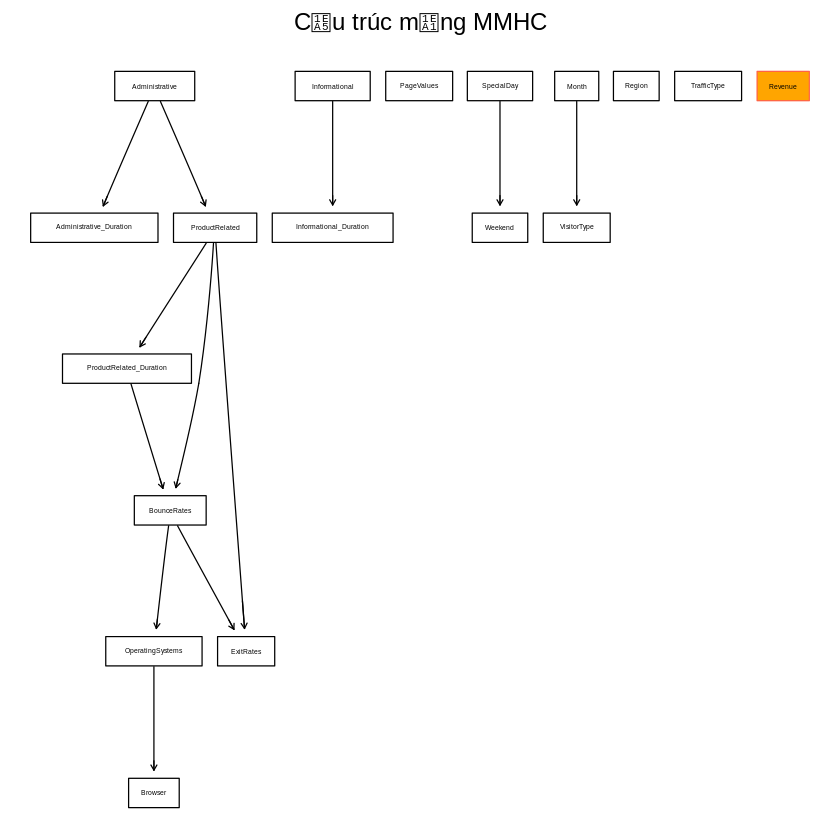

In [49]:
library(bnlearn) # Đảm bảo thư viện đã được nạp

# ----- XÂY DỰNG MÔ HÌNH HYBRID MMHC -----

cat("Bắt đầu xây dựng mô hình MMHC (có thể mất nhiều thời gian hơn hc)...\n")

# --- 1. HUẤN LUYỆN MÔ HÌNH TRÊN TẬP TRAIN ---

# Sử dụng hàm mmhc() để học cấu trúc
mmhc_structure <- mmhc(train_set)

# Học tham số cho cấu trúc MMHC
mmhc_fitted <- bn.fit(mmhc_structure, data = train_set)

cat("Huấn luyện xong mô hình MMHC!\n\n")


# --- 2. DỰ ĐOÁN TRÊN TẬP TEST ---
cat("Bắt đầu dự đoán trên tập test...\n")

# Lấy các đặc trưng của tập test
test_features <- test_set
test_features$Revenue <- NULL

# Thực hiện dự đoán
mmhc_predictions <- predict(mmhc_fitted, node = "Revenue", data = test_features, method = "bayes-lw")

cat("Dự đoán xong!\n\n")


# --- 3. ĐÁNH GIÁ KẾT QUẢ ---
cat("Kết quả đánh giá mô hình MMHC:\n")

# Tạo ma trận nhầm lẫn
mmhc_conf_matrix <- table(Predicted = mmhc_predictions, Actual = test_set$Revenue)

print("Ma trận nhầm lẫn (Confusion Matrix) của MMHC:")
print(mmhc_conf_matrix)

# Tính toán độ chính xác
mmhc_accuracy <- sum(diag(mmhc_conf_matrix)) / sum(mmhc_conf_matrix)

cat("\nĐộ chính xác (Accuracy) của mô hình MMHC trên tập test:", sprintf("%.2f%%", mmhc_accuracy * 100), "\n")


# --- 4. TRỰC QUAN HÓA MÔ HÌNH MMHC (TÙY CHỌN) ---
cat("\nĐang vẽ đồ thị mạng MMHC...\n")

# Tô màu các node liên quan đến Revenue
highlight_options <- list(
  nodes = c("Revenue", mb(mmhc_structure, "Revenue")),
  col = "tomato",
  fill = "orange"
)

graphviz.plot(mmhc_structure, highlight = highlight_options, main = "Cau truc mang MMHC")

In [50]:
# ----- ĐÁNH GIÁ MÔ HÌNH BẰNG K-FOLD CROSS-VALIDATION -----

# Thiết lập seed
set.seed(123)

cat("Bắt đầu thực hiện 10-fold cross-validation...\n\n")

# Gọi hàm bn.cv()
cv_results <- bn.cv(df_final,
                    bn = "mmhc",
                    loss = "pred",
                    loss.args = list(target = "Revenue"))

# In kết quả tóm tắt mặc định
print(cv_results)
all_losses <- sapply(cv_results, '[[', 'loss')
expected_loss <- mean(all_losses, na.rm = TRUE)
# --------------------------------------

Bắt đầu thực hiện 10-fold cross-validation...


  k-fold cross-validation for Bayesian networks

  target learning algorithm:             Max-Min Hill-Climbing 
  number of folds:                       10 
  loss function:                         Classification Error 
  training node:                         Revenue 
  expected loss:                         0.1509327 

